In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Data Set Characteristics:

### Number of Instances:
    20640
### Number of Attributes:
    8 numeric predictive attributes and the target
    

In [23]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train_full, X_test, y_train_full , y_test = train_test_split(housing.data, housing.target, random_state=42)

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_valid = scaler.transform(X_valid)

In [31]:
X_test = scaler.transform(X_test)

In [32]:
np.random.seed(42)

In [33]:
tf.random.set_seed(42)

In [34]:
X_train.shape

(11610, 8)

In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) ##     keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["mae"])

In [44]:
model_history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3973 - mae: 0.4533 - val_loss: 0.3921 - val_mae: 0.4406
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3946 - mae: 0.4510 - val_loss: 0.4173 - val_mae: 0.4453
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3923 - mae: 0.4501 - val_loss: 0.4096 - val_mae: 0.4396
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3899 - mae: 0.4479 - val_loss: 0.4029 - val_mae: 0.4415
Epoch 5/20
363/363 [==============================] - 0s 952us/step - loss: 0.3883 - mae: 0.4468 - val_loss: 0.3863 - val_mae: 0.4372
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3860 - mae: 0.4453 - val_loss: 0.4001 - val_mae: 0.4364
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3846 - mae: 0.4439 - val_loss: 0.3907 - val_mae: 0.4356
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 

In [45]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 745us/step - loss: 0.3657 - mae: 0.4335


In [46]:
model_history.history

{'loss': [0.3972614109516144,
  0.3946440815925598,
  0.3923467993736267,
  0.389914333820343,
  0.38828355073928833,
  0.38601598143577576,
  0.3845558762550354,
  0.3829299211502075,
  0.3812151253223419,
  0.37975209951400757,
  0.37856167554855347,
  0.3769851624965668,
  0.37574344873428345,
  0.374422550201416,
  0.37328171730041504,
  0.3719845712184906,
  0.37097036838531494,
  0.37035366892814636,
  0.3688509464263916,
  0.36817675828933716],
 'mae': [0.45326945185661316,
  0.4509940445423126,
  0.45012184977531433,
  0.44789832830429077,
  0.4467550814151764,
  0.4452897608280182,
  0.4438946843147278,
  0.44309812784194946,
  0.44188112020492554,
  0.4407649338245392,
  0.4395667612552643,
  0.43838366866111755,
  0.43770632147789,
  0.4365854859352112,
  0.4361509382724762,
  0.43555915355682373,
  0.43456244468688965,
  0.4340305030345917,
  0.43275880813598633,
  0.4322732388973236],
 'val_loss': [0.3920844793319702,
  0.41728314757347107,
  0.4096352159976959,
  0.402944

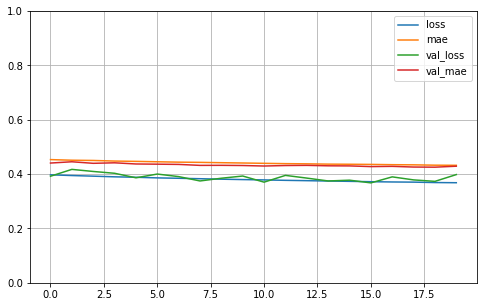

In [47]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [48]:
X_new = X_test[:3]

In [49]:
y_proba = model.predict(X_new)

In [50]:
y_proba.round(2)

array([[0.78],
       [1.81],
       [3.77]], dtype=float32)

In [52]:
y_pred = model.predict_classes(X_new)

In [53]:
y_pred

array([[1],
       [1],
       [1]], dtype=int32)